In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def display(img, cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')

In [10]:
sep_coins = cv2.imread('../Computer-Vision-with-Python/DATA/pennies.jpg')

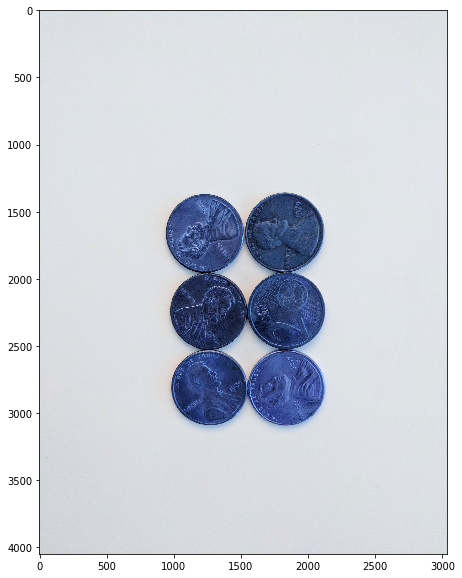

In [11]:
display(sep_coins)

In [12]:
#steps
# grayscale
# Binary Threshold
# find contours

In [13]:
sep_blur = cv2.medianBlur(sep_coins, 25)

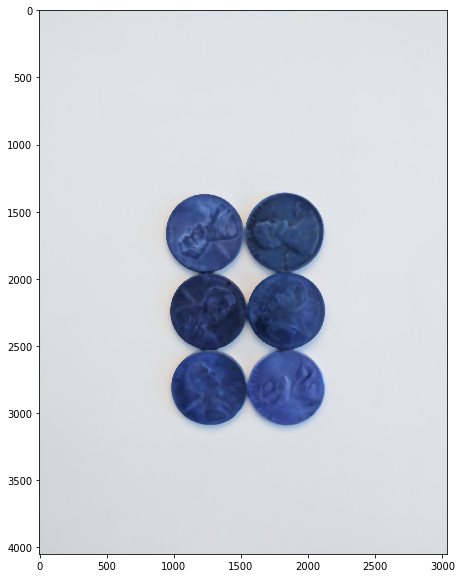

In [14]:
display(sep_blur)

In [15]:
gray_sep_coins = cv2.cvtColor(sep_blur, cv2.COLOR_BGR2GRAY)

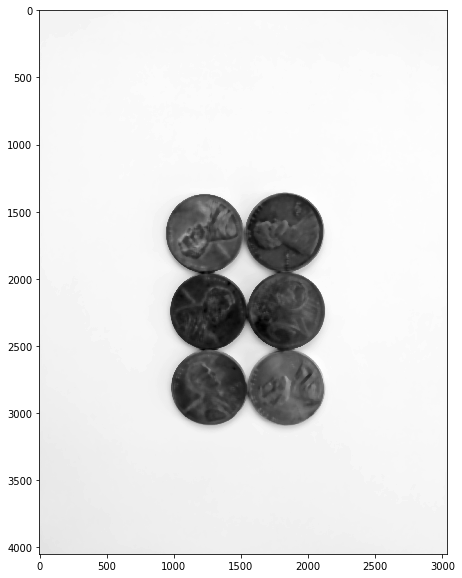

In [16]:
display(gray_sep_coins)

In [17]:
ret, sep_thresh = cv2.threshold(gray_sep_coins, 160, 255, cv2.THRESH_BINARY_INV)

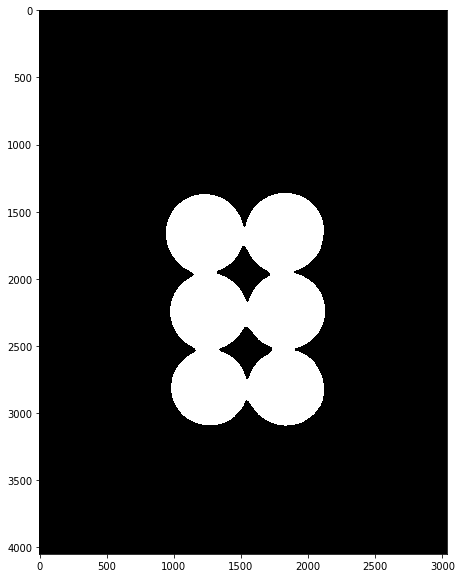

In [18]:
display(sep_thresh)

In [19]:
images,contours,hierarchy = cv2.findContours(sep_thresh.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

In [20]:
for i in range(len(contours)):
    
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(sep_coins, contours, i, (255,0,0), 10)

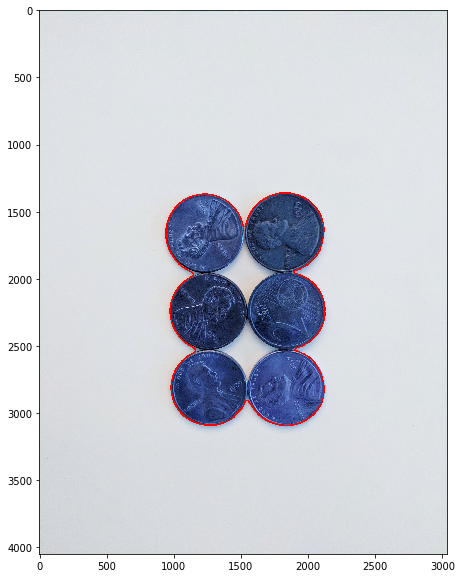

In [21]:
display(sep_coins)

In [22]:
img = cv2.imread('../Computer-Vision-with-Python/DATA/pennies.jpg')

In [23]:
img = cv2.medianBlur(img, 35)

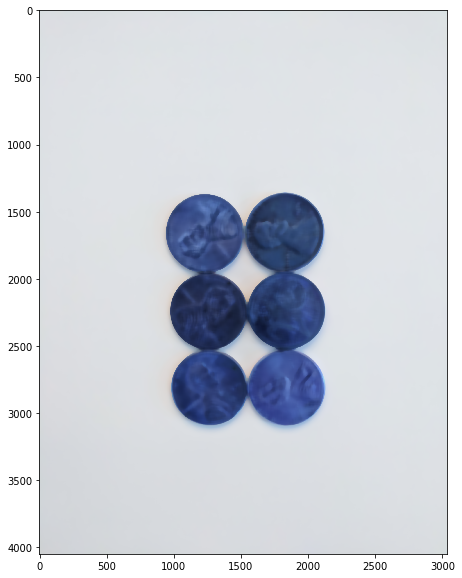

In [24]:
display(img)

In [26]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

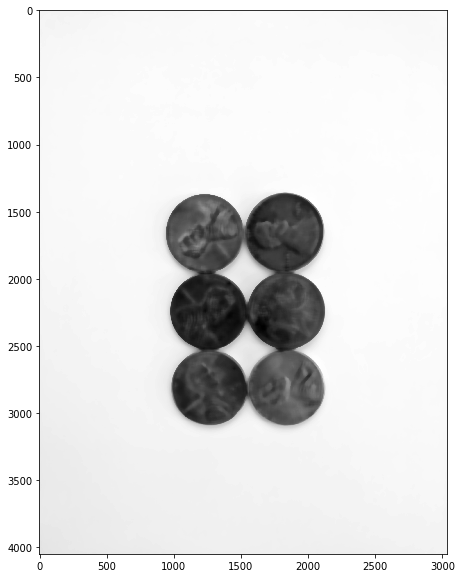

In [27]:
display(gray)

In [28]:
ret, thres = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)

In [29]:
# otsu method for thresholding

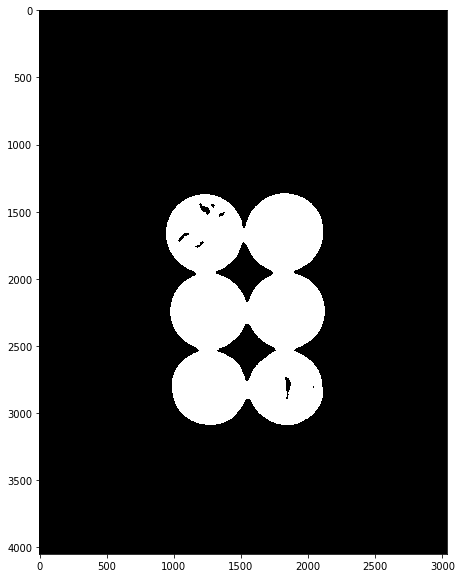

In [30]:
display(thres)

In [31]:
ret, thres = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

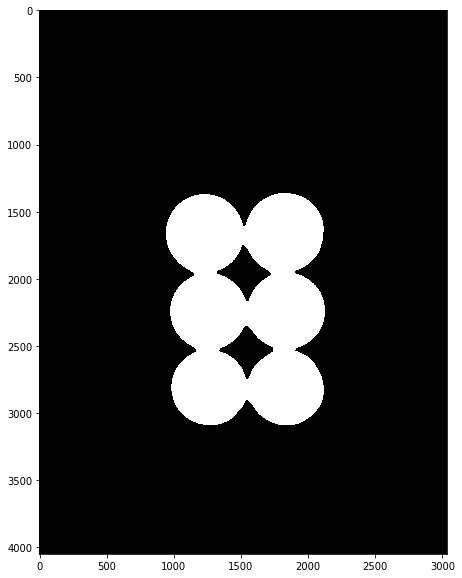

In [32]:
display(thres)

In [33]:
#noise emoval (optional)

In [34]:
kernel = np.ones((3,3), np.uint8)

In [35]:
opening = cv2.morphologyEx(thres, cv2.MORPH_OPEN, kernel, iterations=2)

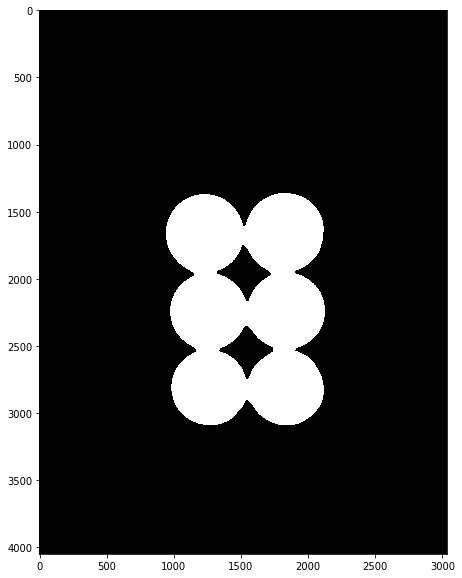

In [36]:
display(opening)

In [37]:
#distance transform

In [38]:
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)

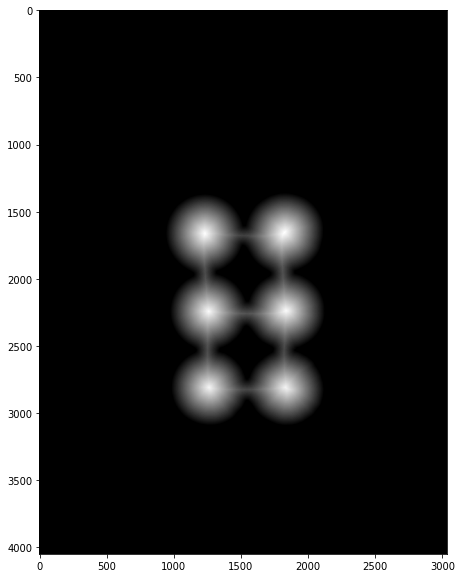

In [39]:
display(dist_transform)

In [40]:
ret, sure_fg = cv2.threshold(dist_transform, 0.7*dist_transform.max(), 255, 0)

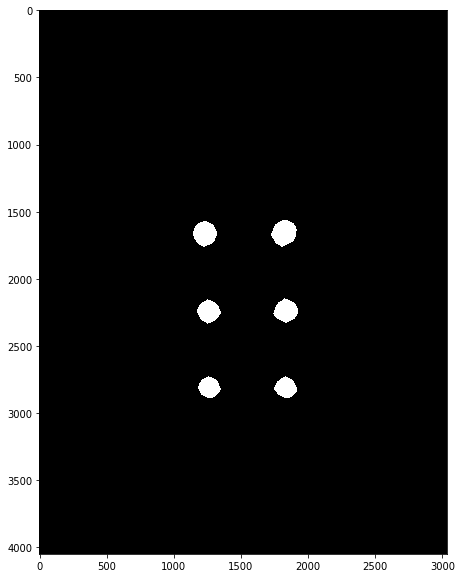

In [41]:
display(sure_fg)

In [42]:
sure_bg = cv2.dilate(opening, kernel, iterations=3)

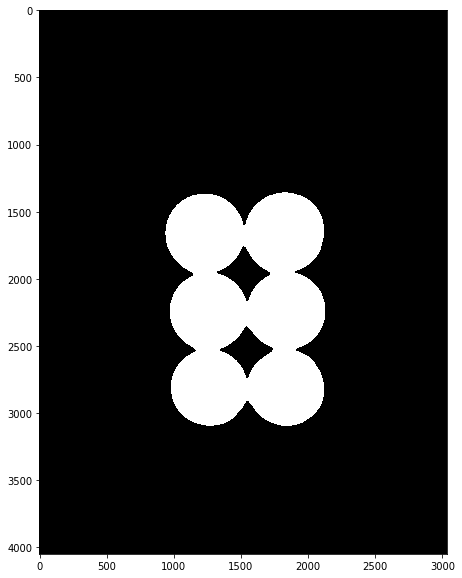

In [43]:
display(sure_bg)

In [44]:
sure_fg = np.uint8(sure_fg)

In [45]:
unkown = cv2.subtract(sure_bg,sure_fg)

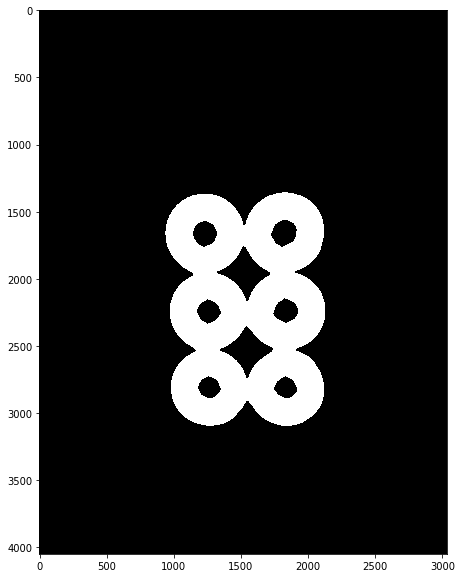

In [46]:
display(unkown)

In [47]:
ret,markers = cv2.connectedComponents(sure_fg)

In [48]:
markers = markers+1

In [49]:
markers[unkown == 255] = 0

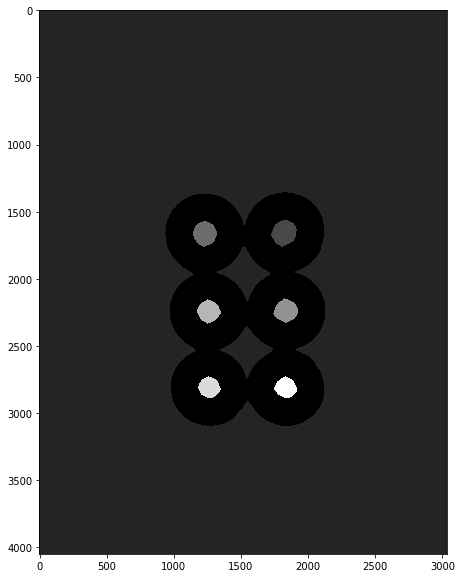

In [50]:
display(markers)

In [51]:
markers = cv2.watershed(img, markers)

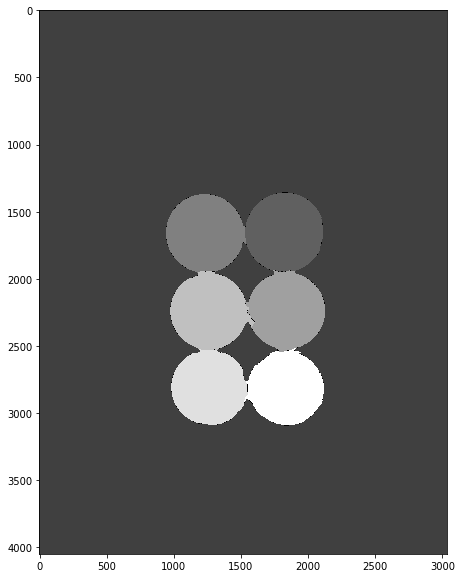

In [52]:
display(markers)

In [54]:
images,contours,hierarchy = cv2.findContours(markers.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

for i in range(len(contours)):
    
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(sep_coins, contours, i, (255,0,0), 10)

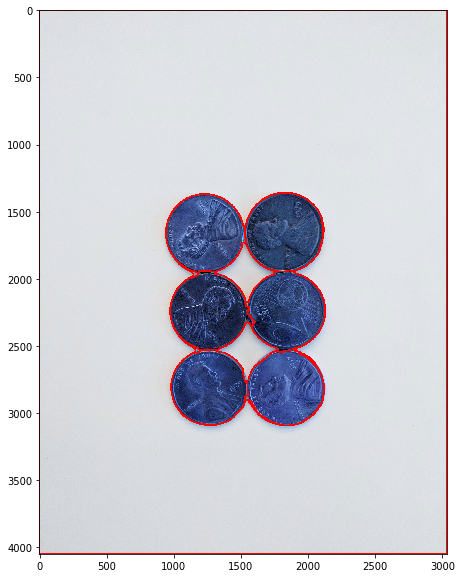

In [55]:
display(sep_coins)